## Reconstruction parcimonieuse


On s'intéresse au problème

$$\hspace{5cm} (\mathcal{P})\quad \min_{x\in \mathbb{R}^n}f(x) = \frac{1}{2}\Vert H x-y \Vert_W^2+\lambda \Vert x \Vert_1 $$

avec $y\in \mathbb{R}^m$ une observation du signal à reconstruire, $H\in \mathcal{M}_{m,n}(\mathbb{R})$, $W\in \mathcal{M}_{m}(\mathbb{R})$ symétrique définie positive. La matrice $W$ introduit une pondération sur les composantes du résidu.

**Question 1 :** Justifier la convexité de la fonctionnelle et donner un sous-gradient.


In [2]:
23

23

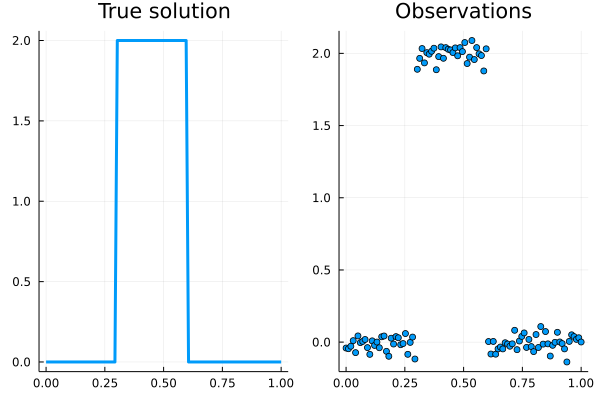

In [3]:
#Pkg.add("Plots")
using Plots

# Construction du problème #
############################

# solution à reconstruire 
##########################
dx=0.01;

n=Int(1/dx);#+1;
px=LinRange(0.,1.,n);
xt=zeros(n,1);

for i = 1:n
    if (px[i] > 0.3 && px[i]< 0.6)
        xt[i] = 2;         
    end
end


#observations
#############
nobs=1;
m=Int(floor(n/nobs));
var_obs=0.05;
sigmaW=ones(m,1)+2.0*rand(Float64,(m,1));

H=zeros(m,n);
py=zeros(m,1);
W=zeros(m,m);
for i=1:m
   H[i,(i-1)*nobs+1]=1;
   py[i]=px[(i-1)*nobs+1]; 
   W[i,i]=sigmaW[i];
end    
y=H*xt+var_obs*randn(Float64,(m,1));


p1=plot(px,xt,title="True solution",label=["xt"],lw=3);
p2=scatter(py,y,title="Observations",lw=3);
plot(p1,p2,layout=(1,2),legend=false)

**Question 2 :** Proposer le calcul de l'évaluation de f et d'un sous-gradient de f

In [4]:
using LinearAlgebra

In [5]:
function normW(x::Array, W::Matrix)
    norm = transpose(x) * W * x
    return norm[1]
end

normW (generic function with 1 method)

In [6]:
# Fonction évaluant f en x
function evalf(x,y,H,W,lambda) 
    # Insérer votre code
    return 0.5*normW(H*x - y, W) + lambda*norm(x, 1)
    # Fin insérer code
end

# Fonction évaluant un sous-gradient de f en x
function subgradf(x,y,H,W,lambda) 
    # Insérer votre code
    return 0.5*transpose(H)*W*(H*x - y) + lambda*sign.(x)
    # Fin insérer code
end

subgradf (generic function with 1 method)

**Question 3 :** Résoudre le problème en utilisant un algorithme de sous-gradient. Vous implanterez les trois stratégies de pas vues en cours. Vous afficherez les courbes de convergence de $f_{best}^k$. 

**Question 4 :** Quelle influence a le paramètre $\lambda$ sur la convergence de l'algorithme et la qualité de la soltuion optimisée ?

In [7]:
#Pkg.add("Plots")
using Plots

#Initialisation
x = zeros(n, 1);
xbest = x;
i = 0;
fbest = 1000000; # $f_{best}^0$
histo = [];# Suite des itérés f_{best}^k

lambda = 1e-2;

choix_pas = 1;
itermax = 500;

xp = x;
fbest = +Inf
xbest = +Inf
while i < itermax
    i = i + 1
    # Insérer votre code
    grad_k = subgradf(xp, y, H, W, lambda)
    
    if choix_pas == 1
        xp -= 1e-2 * grad_k #Constant
    elseif choix_pas == 2
        xp -= 1 / (100 * i) * grad_k #S1 diverge et S2 converge
    elseif choix_pas == 3
        xp -= 1 / (1000 * sqrt(i)) * grad_k #S1 diverge et S2 diverge
    end
    fxp = evalf(xp, y, H, W, lambda)

    if fxp < fbest
        fbest = fxp
        xbest = xp
    end
    # Fin insérer code

    # Stockage
    append!(histo, fbest)
end

#histo
#Affichage des courbes de convergence
plotly();
iter = 1:itermax;
plot(iter, histo, title = "Convergence curve", label = ["f"], lw = 3)

In [8]:
#Pkg.add("Plots")
using Plots

#Initialisation
x = zeros(n, 1);
xbest = x;
i = 0;
fbest = 1000000; # $f_{best}^0$
histo = [];# Suite des itérés f_{best}^k

lambda = 2;

choix_pas = 1;
itermax = 500;

xp = x;
fbest = +Inf
xbest = +Inf
while i < itermax
    i = i + 1
    # Insérer votre code
    grad_k = subgradf(xp, y, H, W, lambda)
    
    if choix_pas == 1
        xp -= 1e-2 * grad_k #Constant
    elseif choix_pas == 2
        xp -= 1 / (100 * i) * grad_k #S1 diverge et S2 converge
    elseif choix_pas == 3
        xp -= 1 / (1000 * sqrt(i)) * grad_k #S1 diverge et S2 diverge
    end
    fxp = evalf(xp, y, H, W, lambda)

    if fxp < fbest
        fbest = fxp
        xbest = xp
    end
    # Fin insérer code

    # Stockage
    append!(histo, fbest)
end

#histo
#Affichage des courbes de convergence
plotly();
iter = 1:itermax;
plot(iter, histo, title = "Convergence curve", label = ["f"], lw = 3)

In [9]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 5 :** On pose $h(x)=\lambda \Vert x\Vert_1$ et $g(x)=\frac{1}{2}\Vert Hx-y\Vert_W^2$. Donner une expression analytique de la fonction proximale de h et implanter cette fonction. Implanter la fonction $g$ ainsi que son gradient.


$$prox_{h}(x, \lambda) = \begin{cases}
    x_i-\lambda, & \text{if $x_i>\lambda$}.\\
    0, & \text{if $x_i \in [-\lambda, \lambda]$}.\\
    x_i+\lambda, & \text{if $x_i<\lambda$}.
    
  \end{cases}$$

In [10]:
# Evaluation de prox_h
function proxh(x,lambda) 
    # Insérer votre code
    v = zeros(m)
    for i = 1:m
        xi = x[i]
        if xi > lambda
            v[i] = xi - lambda
        elseif xi < lambda
            v[i] = xi + lambda
        else
            v[i] = 0
        end
    end
    return v
    # Fin insérer code
end

#Evaluation de g
function evalg(x,y,H,W)
    # Insérer votre code
    return 0.5*normW(H*x - y, W)
    # Fin insérer code
end    


#Evaluation du gradient de g
function gradg(x,y,H,W)
    # Insérer votre code
    return 0.5*transpose(H)*W*(H*x-y)
    # Fin insérer code
end    

gradg (generic function with 1 method)

**Question 6 :** Résoudre le problème par la méthode du gradient proximal avec recherche linéaire pour le pas. Vous implanterez en prémabule la fonction de recherche linéaire.

In [11]:
# Fonction calculant le pas par recherche linéaire
# Insérer votre code
function recherche_lineaire(alpha_zero, beta, xk, itermax)
    alphak = alpha_zero
    k = 0
    while k < itermax
        k += 1
        alphak *= beta
        gradgk = gradg(xk, y, H, W)
        Gk = (xk - proxh(xk - alphak * gradgk, lambda*alphak)) / alphak
        terme1 = evalg(xk - alphak * Gk, y, H, W)
        terme2 = evalg(xk, y, H, W) - (alphak*transpose(gradgk)*Gk)[1] + 0.5 * alphak * norm(Gk)^2
        if terme1 <= terme2
            return alphak
        end
    end
    return alphak
end
# Fin insérer code

recherche_lineaire (generic function with 1 method)

In [12]:
#Initialisation
x = zeros(n, 1);
xbest = x;
i = 0;
fbest = 1000000; # $f_{best}^0$
histo = [];# Suite des itérés f_{best}^k 

alpha0 = 100;
itermax = 500;
beta = 0.5;

xp = x;
while i < itermax
    i = i + 1
    # Insérer votre code
    alphak = recherche_lineaire(alpha0, beta, xp, +Inf)
    #alphak = 1.e-2
    gradgk = gradg(xp, y, H, W)


    xp = proxh(xp - alphak * gradgk, lambda * alphak)

    fxp = evalf(xp, y, H, W, lambda)

    if fxp < fbest
        fbest = fxp
        xbest = xp
    end
    # Fin insérer code

    # Stockage
    append!(histo, fbest)
end
#histo
#Affichage des courbes de convergence
plotly();
iter = 1:itermax;
plot(iter, histo, title = "Convergence curve", label = ["f"], lw = 3)

In [13]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

**Question 7 :** Evaluez la sensisibilité de l'algorithme aux différents paramètres : $\lambda_0$, $\beta$, itermax.  

In [14]:
function benchmark(alpha0, itermax, beta)
    #Initialisation
    x = zeros(n, 1)
    xbest = x
    i = 0
    fbest = +Inf # $f_{best}^0$
    histo = []# Suite des itérés f_{best}^k 
    alpha0 = alpha0
    itermax = itermax
    beta = beta

    xp = x
    while i < itermax
        i = i + 1
        # Insérer votre code
        alpha = recherche_lineaire(alpha0, beta, xp, +Inf)
        #alpha = 1.e-1
        gradgk = gradg(xp, y, H, W)


        xp = proxh(xp - alpha * gradgk, lambda * alpha)

        fxp = evalf(xp, y, H, W, lambda)

        if fxp < fbest
            fbest = fxp
            xbest = xp
        end
        # Fin insérer code

        # Stockage
        append!(histo, fbest)
    end
    return norm(xt - xbest)
end


benchmark (generic function with 1 method)

In [15]:
benchmark(0.00001, itermax, beta)

10.952069833490699

In [16]:
lin_alpha0 = LinRange(0.00001, 0.1, 10);
res_alpha0 = benchmark.(lin_alpha0, 500, 0.5)
plot(lin_alpha0, res_alpha0, title = "Residus pour les alpha0", label="alpha0", lw = 3)

In [ ]:
lin_itermax = LinRange(50, 500, 20);
res_itermax = benchmark.(100, lin_itermax, 0.5)
plot(lin_itermax, res_itermax, title = "Residus pour les itermax", label = "itermax", lw = 3)

In [18]:
lin_beta = LinRange(0.001, 1.0, 20);
res_beta = benchmark.(100, 1000, lin_beta)
plot(lin_beta, res_beta, title = "Residus pour les beta", label = "beta", lw = 3)

In [ ]:
#Initialisation
x = zeros(n, 1);
xbest = x;
i = 0;
fbest = 1000000; # $f_{best}^0$
histo = [];# Suite des itérés f_{best}^k 

alpha0 = 100;
itermax = 500;
beta = 0.5;

new_xp = x;
new_yp = zeros(n, 1)
while i < itermax
    xp = new_xp
    yp = new_yp
    i = i + 1
    # Insérer votre code
    alphak = recherche_lineaire(alpha0, beta, xp, +Inf)
    #alphak = 1.e-2
    gradgk = gradg(xp, y, H, W)


    new_xp = proxh(yp - alphak * gradgk, lambda * alphak)
    new_yp = new_xp + ((i - 1) / (i + 2)) * (new_xp - xp)
    fxp = evalf(xp, y, H, W, lambda)

    if fxp < fbest
        fbest = fxp
        xbest = xp
    end
    # Fin insérer code

    # Stockage
    append!(histo, fbest)
end
#histo
#Affichage des courbes de convergence
plotly();
iter = 1:itermax;
plot(iter, histo, title = "Convergence curve", label = ["f"], lw = 3)

In [ ]:
x=[xt,xbest];

plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)